In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def dscb(m,m0,sigL,sigR,aL,nL,aR,nR):

    AL = (nL/abs(aL))**nL*np.exp(-aL**2/2)
    AR = (nL/abs(aL))**nL*np.exp(-aL**2/2)

    BL = nL/abs(aL) - abs(aL)
    BR = nL/abs(aL) - abs(aL)

    if ((m-m0)/sigL < -aL):
        return AL * (BL - (m-m0)/sigL)**(-nL)
    elif ((m-m0)/sigL <= 0):
        return np.exp(-0.5*((m-m0)/sigL)**2)
    elif ((m-m0)/sigR <= aR):
        return np.exp(-0.5*((m-m0)/sigR)**2)
    else:
        return AR * (BR + (m-m0)/sigR)**(-nR)

In [4]:
m0 = 1
sigL = 1
sigR = 1
aL = 1
aR = 1
nL = 1
nR = 1

In [30]:
steps = np.linspace(-5,5,100)

AL = (nL/abs(aL))**nL*np.exp(-aL**2/2)
AR = (nL/abs(aL))**nL*np.exp(-aL**2/2)

BL = nL/abs(aL) - abs(aL)
BR = nL/abs(aL) - abs(aL)

cond1 = np.where((steps-m0)/sigL < -aL,AL * (BL - (steps-m0)/sigL)**(-nL), np.nan)
cond2 = np.where(np.logical_and(((steps-m0)/sigL > -aL),(((steps-m0)/sigL)<=0)),np.exp(-0.5*((steps-m0)/sigL)**2) , np.nan)
cond3 = np.where(np.logical_and(((steps-m0)/sigL >= 0),(((steps-m0)/sigR)<=aR)),np.exp(-0.5*((steps-m0)/sigR)**2) , np.nan)
cond4 = np.where(((steps-m0)/sigL > aR),AR * (BR - (steps-m0)/sigR)**(-nR), np.nan)


In [13]:
val = []

steps = np.linspace(-5,5,100)
for step in steps:
    val.append(dscb(step,m0,sigL,sigR,aL,nL,aR,nR))

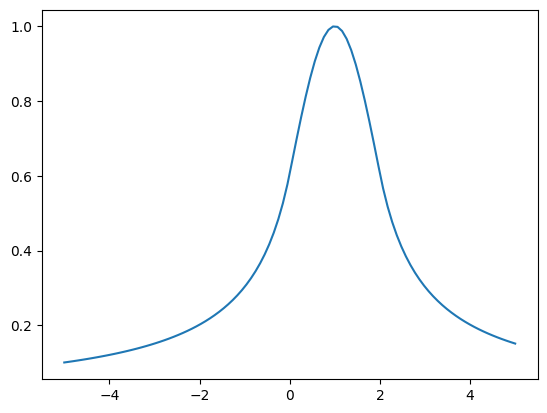

In [15]:
plt.plot(steps,val)